# ERD (데이터 분석)

In [1]:
import pandas as pd

train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

# train 만 찍으면 100만개의 data가 찍히므로 잘 안보이니까 head로 확인
train.head() # head : 상위 5개의 row만 보여준다.

# 만약 Nan이 찍혔다면 feature engineering을 통해 (평균값으로 메꾸던지, 없애던지..)해서 데이터 전처리

C:\Users\hojun\AppData\Local\Temp\ipykernel_20948\1064037160.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# train과 달리 survived 열이 없는 것을  확인 가능함
# 우린 train data를 통해 모델을 학습하여 test data의 feature를 보고 생존 여부를 예측해야 함
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# data 정보 확인하기 (len, shape)
train.shape, test.shape # (891, 12), (418, 11)

((891, 12), (418, 11))

In [4]:
# 빠진 정보 찾기 by info()

train.info() # info, info() 둘 다 되는데, ()로 하자

# 행은 891행인데, age, cabin에 누락된 것들이 보임 891개가 아님 >> NaN 이라서 빠진 것
# 이렇게 유실된 정보를 그대로 모델링하면 이상한 값이 나오거나, 학습이 안 됨(개수가 안 맞아서)
# 그러므로 feature engineering를 통해 유실값을 채운다. (아까 말한 평균값 넣기 등..)
# 의미있는 값으로 채운 후 모델로 학습해야 함!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# test dataset 정보
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# 빠진 정보 찾는 방법 2 : isnull().sum()
# train.isnull() # 모든 행의 열 성분이 null인지 아닌지 판단
train.isnull().sum() # 각 필드중 null이 몇개인지 누계

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 데이터 시각화 (matplotlib, seaborn)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 계속 똑같은 기능을 수행할 것이기 때문에 미리 함수로 지정
def bar_chart(feature):
    # 입력된 feature의 개수를 센다.
    # 이 과정은 기억해두기 (step 1 ~ 4)
    survived = train[train['Survived']==1][feature].value_counts() # step 1. 시각화 할 특징의 개수 세기
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead]) # step2. 시각화 할 특징들을 dataframe화
    df.index = ['survived', 'dead'] # step3. 시각화 할 특징들 표에 표현하기 위해 idx로 만듦
    df.plot(kind='bar',stacked=True, figsize=(10,5)) # step4. 차트에 그리기 (차트 유형, 쌓기 유형, 크기)

In [10]:
# train.corr()
# [train_dataset['Survived']==1] # 모든 행에 대해 살았냐 아니냐 여부만 보여줌 (survived filed only)
# train_dataset[train_dataset['Survived']==1] # 살은 사람에 대한 모든 정보를 출력 (이름, 성별 ~~ embarked)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

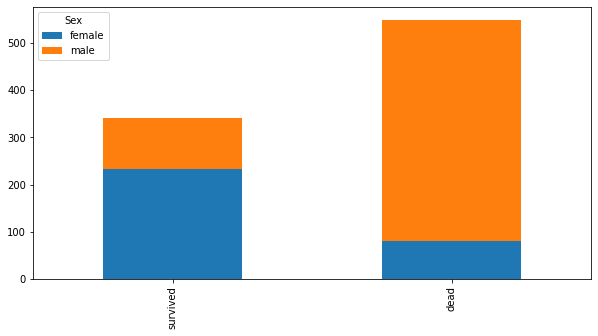

In [91]:
# 이걸 보고 여자가 남자보다는 살 확률이 높았다. 라는 것을 알 수 있음
bar_chart('Sex')

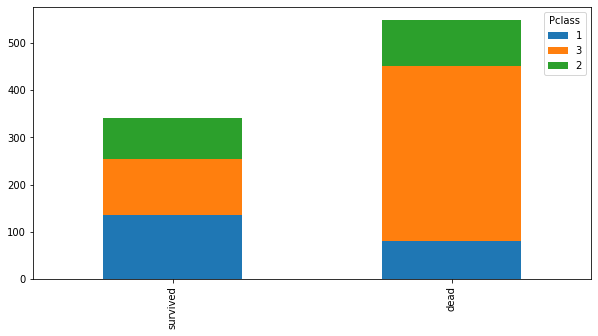

In [92]:
# 이것을 보고 1등석이 많이 살고, 3등석이 많이 죽은 것을 알 수 있음
bar_chart('Pclass')

# Feature Engieneering (데이터 전처리)

In [12]:
# feature(열)의 모든 성분이 숫자라면 이것은 feature vector로 표현 가능
# feature vector : [0, 1, 0, 1, 0, 0, 0, ...]
# 컴퓨터는 숫자로 알아보는게 훨씬 편하므로 텍스트의 value가 가진 것도 numeric하게 바꿔주면 좋음 (ex: Name)
# 같은 원리로 NaN도 웬만해선 숫자로 표현해서 넣는게 좋음

# 이렇게 2개를 엮음으로써 굳이 train, test 나눠서 처리하지 않아도됨 >> 아래의 for문으로 2 dataset 다 Title이란 field가 생김김
train_test_dataset = [train, test] # combining train and test dataset

for dataset in train_test_dataset:
    # 이름 중 Mr, Mrs 처럼 성별을 알 수 있는 정보들을 추출
    # by extract(' ([A-Za-z]+)\.') 정규 표현식으로 맨 앞 공백 허용 
    # [A-Za-z]+ : 1문자 이상의 영단어 허용
    # \. : 끝은 .으로 끝나도록 \를 넣어서 .은 인식 안하도록
    # 이 정규 표현식은 공백 뒤에 오는 하나 이상의 영어 단어와 그 단어 다음에 마침표가 있는 패턴을 찾습니다. (Mr. , Mrs. 등등)
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



In [94]:
train.head() # Title이란 field 생성

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [95]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [96]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [13]:
# 문자 내용을 numeric하게 변환 by mapping Table
# 많이 나온 Mr, Miss, Mrs 빼고 나머지는 모두 others인 3번 label로 처리
title_mapping = {
    "Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Col" : 3,
    "Rev" : 3, "Ms" : 3, "Dr" : 3, "Dona" : 3, "Mme" : 3, "Sir" : 3
}

for dataset in train_test_dataset:
    dataset['Title'] = dataset['Title'].map(title_mapping) # 기존 문자로 되어있던 Title value들을 숫자로 변환 by title_mapping table

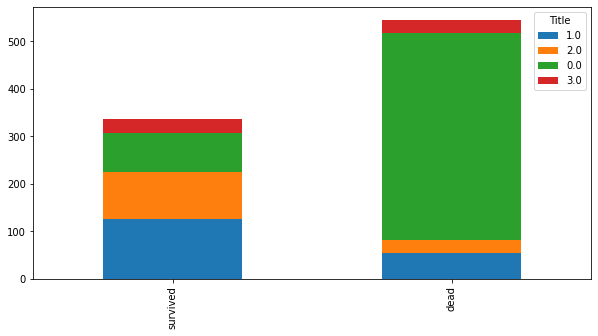

In [98]:
# 문자로 분석한 결과
bar_chart('Title') # 실행 결과 많은 Mr가 죽었고, 많은 Miss와 Mrs인 여성들이 생존

In [99]:
train.head() # Title이 숫자로 매핑됨됨

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


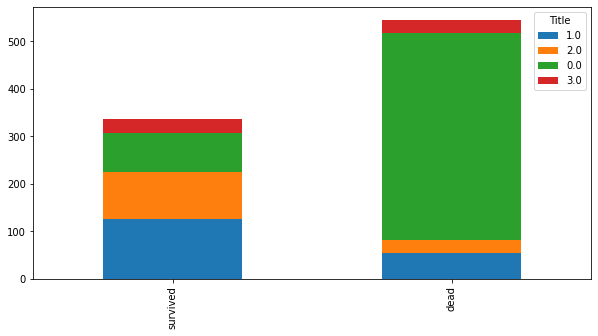

In [100]:
# 숫자로 변환하고 분석한 결과 >> 확실히 문자로 분석한 것과는 차이가 있음
bar_chart('Title')

In [14]:
# name중 유의미한 정보만 뽑아서 title에 숫자로 매핑했으므로
# name은 이제 쓸모없으니 field 삭제한다.
# axis=1 열방향 삭제, axis=0 행방향 삭제
# inplace > 원본에도 적용할 것인가?
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [15]:
train.head() # name field 삭제

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


# 성별에 대한 feature engieneering

In [16]:
# train.corr() # corr() 쓸거면 반드시 object가 없어야 다 숫자로 바꾸고 할 수 있음

ValueError: could not convert string to float: 'male'

In [17]:
sex_mapping = {'male': 0, 'female': 1}

for dataset in train_test_dataset:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

train.head() # Sex에 대한 내용이 문자(male, female) -> 숫자(0, 1)로 변환됨

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


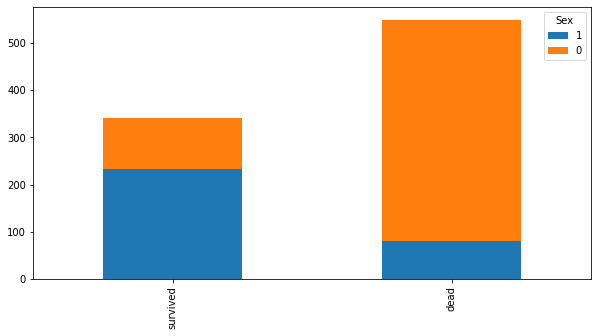

In [104]:
bar_chart('Sex')

## Nan 숫자 채우기 by fillna

In [105]:
train.head(100) # Age에 NaN이 은근 보임 이것을 채우자 어떤 방식으로 채울까?

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


In [21]:
# 그냥 Age 모두 더해서 평균나이로 때울 수 있지만 이것 보다 조금 더 고도화해서
# 남자라면 남자의 평균나이를, 여자라면 여자의 평균나이를 넣는 것이 조금 더 좋은 전략
# 여기서도 여자의 경우 Miss 인지 Mrs에 따라 이에 대한 평균나이 넣기 (결혼했냐 안 했냐로)

# 이 수식 해석
# Nan 값이 있을 때 각 Title 별로 묶어서 (Mr, Miss, Mrs)

# 각 Title 별 Age를 구하고 그것의 median으로 Nan 값들을 채워라
# train.fillna(train.groupby('Title')["Age"].transform("median"), inplace=False)
# test.fillna(test.groupby("Title")["Age"].transform("median"), inplace=False)

# fillna의 결과를 명시적으로 Age 열에 할당 >> 위의 방식보단 이걸로 하면 다 채워짐
train['Age'] = train['Age'].fillna(train.groupby('Title')['Age'].transform("median"))
test['Age'] = test['Age'].fillna(test.groupby('Title')['Age'].transform("median"))

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0.0


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        882 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [108]:
# Title로 묶인 train_dataset 객체 > generic형태라 볼 수 없음
# train_dataset.groupby('Title')

# Title로 그룹화된 train_dataset중 'Age' value만 모음
# train_dataset.groupby('Title')['Age']

# 해당 Age들을 모두 중간값으로 변환
# train_dataset.groupby('Title')['Age'].transform("median")

# fillna의 결과를 명시적으로 Age 열에 할당

# print(train.groupby("Title")["Age"].transform("median").isna().sum())

# Binning (범주화 시키기 정확한 나이보다는 연령으로 표현)

In [109]:
for dataset in train_test_dataset:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [110]:
train.head() # Age가 numeric -> categoric (범주형)으로 바뀜

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


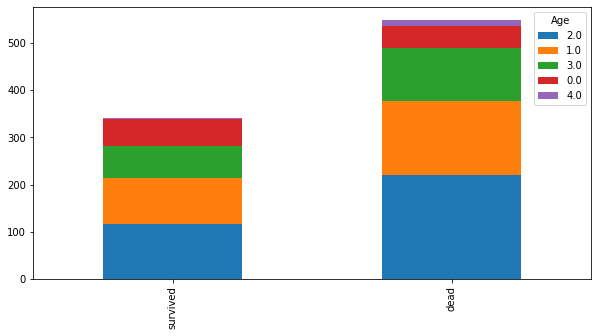

In [111]:
bar_chart('Age') # 나이는 너무 세분화하면 잘못 이해할 수 있으므로 이렇게 범주로 바꾸는게 예측에 편리함

# Embarked


<Axes: >

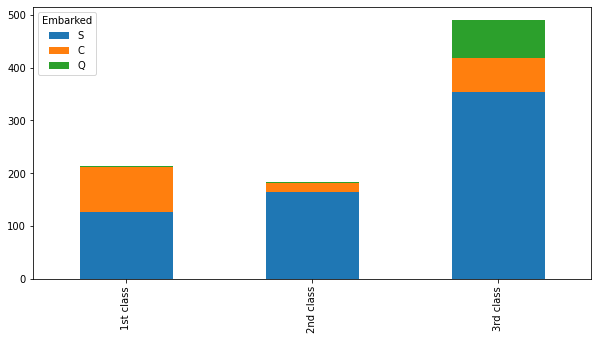

In [22]:
# embarked와 Pclass의 상관관계 분석
# embarked도 str 형태이므로 numeric mapping 필요
Pclass1 = train[train["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Embarked"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Embarked"].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

# 정보를 찍어보니 Embarked에 Nan이 있다면 그냥 s라 채우는게 맞을 듯 (거의 s에서 탄 사람)
# Q에서 탄사람은 모두 3등급에 탄 사람이라 봐도 무방

In [23]:
# 정보를 찍어보니 Embarked에 Nan이 있다면 그냥 s라 채우는게 맞을 듯 (분석결과 거의 s에서 탄 사람이라)
# 위 정보에 의해 Embarked에 빈값 s로 채우기
for dataset in train_test_dataset:
    dataset['Embarked'] = dataset['Embarked'].fillna('S') # fillna하면 알아서 빈값인 애만 채움 일일이 if문 안돌려도

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0.0


In [24]:
# Embarked도 문자 정보이므로 숫자로 변환
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_dataset:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping) # transform과 map의 차이 : transform은 값을 중간값 등으로, map은 매핑

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,0,0.0
1,2,1,1,1,38.0,1,0,71.2833,C85,1,2.0
2,3,1,3,1,26.0,0,0,7.9250,NaN,0,1.0
3,4,1,1,1,35.0,1,0,53.1000,C123,0,2.0
4,5,0,3,0,35.0,0,0,8.0500,NaN,0,0.0


In [115]:
train.info()# 이제 Cabin, Title만 누락값이 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        882 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [26]:
# 티켓 가격(Fare)에 대해서 분류
# 티켓 가격은 PClass와 상관관계가 있을것이므로, pclass 마다의 평균값으로 결측치를 메꿈
# 근데 Fare도 결측치는 없는데? >> test만 있긴 함함

# train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

test.info() # Fare 1개의 결측치 채워졌음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


C:\Users\hojun\AppData\Local\Temp\ipykernel_20948\2923201395.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)


c:\Users\hojun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\hojun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


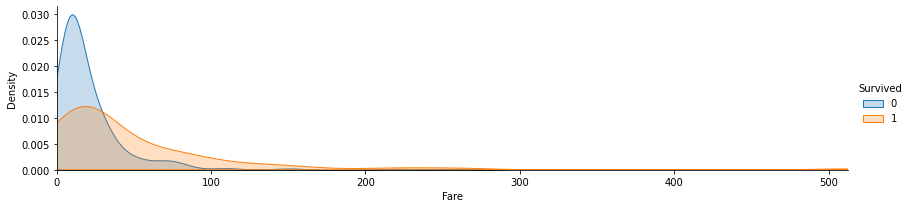

In [118]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train["Fare"].max()))
facet.add_legend()

plt.show() # 찍어보니 싼 티켓(Fare)의 사람이 비싼 티켓 사람보다 많이 죽은 것을 알 수 있다.

In [119]:
# binning을 써서 가격(Fare)도 범주화하자

for dataset in train_test_dataset:
    dataset.loc[ dataset["Fare"] <= 17, 'Fare'] = 0
    dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [120]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


# Cabin은 문자에다가 nan도 있는데 어떻게 채울것이고 숫자로 바꿀까 ?

In [121]:
train["Cabin"].value_counts() # 찍어보니 Cabin의 패턴은 알파벳이 1개있고 이후 숫자가 오는 패턴

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [30]:
# 첫번째 알파벳 한 글자만 받아오자
for dataset in train_test_dataset:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

train.head()

AttributeError: Can only use .str accessor with string values!

<Axes: >

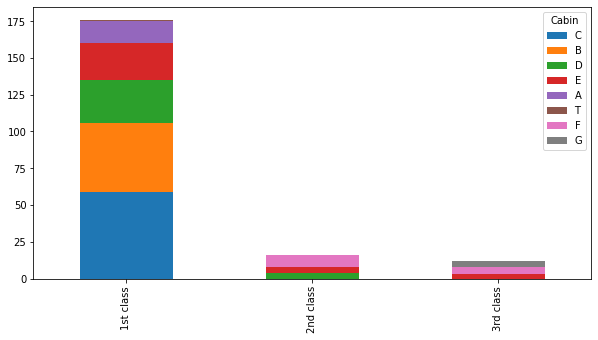

In [123]:
# 각 class에 따른 Cabin(방) 카운트 (클래스가 좋을 수록 방도 특정 종류이지 않을까?)
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts() 
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5)) # cabin이 A,B,C로 시작하면 1등급에만 거의 존재

In [27]:
# feature scailing으로 cabin을 범주화 (정확히 왜 그렇게 뒀는지는 검색하기)
# 우선 매핑을 통해 str -> numeric으로 변환
cabin_mapping = {'A': 0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2.0, 'G':2.4, 'T':2.8}
for dataset in train_test_dataset:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,0,0.0
1,2,1,1,1,38.0,1,0,71.2833,NaN,1,2.0
2,3,1,3,1,26.0,0,0,7.9250,NaN,0,1.0
3,4,1,1,1,35.0,1,0,53.1000,NaN,0,2.0
4,5,0,3,0,35.0,0,0,8.0500,NaN,0,0.0


In [28]:
# 우선 매핑을 통해 str -> numeric으로 변환까진 했는데,
# 이제 Nan값은 어떻게 채울까?
# Cabin은 Pclass와 상당히 상관관계가 있으므로 Pclass로 구분지어 중간값 삽입
# train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
# test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

train["Cabin"] = train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"))
test["Cabin"] = test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"))

train.isna().sum(), test.isna().sum() # 이제 Title 빼고 결측치는 채워짐

(PassengerId      0
 Survived         0
 Pclass           0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Fare             0
 Cabin          491
 Embarked         0
 Title            9
 dtype: int64,
 PassengerId      0
 Pclass           0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          234
 Embarked         0
 Title            0
 dtype: int64)

In [31]:
train.drop('Cabin',axis=1, inplace=True)

In [32]:
# feature 별 상관관계 분석 내적에 기반한 유사도
# 숫자가 1에 가까울 수록 유효
# 숫자가 0이면 관계 x, -1이면 안 좋은 관계
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.037916,-0.057527,-0.001652,0.012658,-0.030467,-0.016061
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.076046,-0.035322,0.081629,0.257307,0.106811,0.452992
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.348405,0.083081,0.018443,-0.549500,0.045702,-0.131844
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.103768,0.114631,0.245489,0.182333,0.116569,0.572983
Age,0.037916,-0.076046,-0.348405,-0.103768,1.000000,-0.260858,-0.185342,0.097648,-0.033294,-0.186272
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.260858,1.000000,0.414838,0.159651,-0.059961,0.302731
Parch,-0.001652,0.081629,0.018443,0.245489,-0.185342,0.414838,1.000000,0.216225,-0.078665,0.360673
Fare,0.012658,0.257307,-0.549500,0.182333,0.097648,0.159651,0.216225,1.000000,0.062142,0.143165
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.033294,-0.059961,-0.078665,0.062142,1.000000,0.048085
Title,-0.016061,0.452992,-0.131844,0.572983,-0.186272,0.302731,0.360673,0.143165,0.048085,1.000000


In [38]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,882.000000
mean,446.000000,0.383838,2.308642,0.352413,29.367194,0.523008,0.381594,32.204208,0.361392,0.687075
std,257.353842,0.486592,0.836071,0.477990,13.236207,1.102743,0.806057,49.693429,0.635673,0.945527
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,3.000000


In [43]:
x1 = train['Age'].quantile(.25) # Age 분포의 0.25 지역 뽑기
x2 = train['Age'].quantile(.75) # Age 분포의 0.75 지역 뽑기
IQR = x2 - x1
min_iqr = x1-1.5*IQR # 하한치
max_iqr = x2+1.5*IQR # 상한치
print(min_iqr, max_iqr)
cnt = sum((train['Age'] < min_iqr) | (train['Age'] > max_iqr))
print(f"이상치는 {cnt}개 입니다.")

0.0 56.0
이상치는 35개 입니다.


In [44]:
# 이상치 중간값 (IQR)로 대체하기
train['Age'] = train['Age'].apply(lambda x: IQR if (x < min_iqr or x > max_iqr) else x)
cnt = sum((train['Age'] < min_iqr) | (train['Age'] > max_iqr))
print(f"이상치는 {cnt}개 입니다.")

이상치는 0개 입니다.


In [46]:
# 숫자형과 문자형 데이터 분리
# 숫자형일 때 주로 스케일링 적용, 스케일링 방식 (1. 정규화, 2. 표준화)
# 머신러닝에선 주로 표준화를 씀 (정규화는 딥러닝 학습에서 주로 사용 0 ~ 1 값으로 만듦)
numeric = train.select_dtypes(exclude='object').copy()
numeric.info()


# 문자형인 데이터의 경우는 스케일링 적용 x, 대신 인코딩을 적용
category = train.select_dtypes(include='object').copy() 
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        882 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 69.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Empty DataFrame


In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
scaled_x = scaler.fit_transform(train) # 이렇게하면 df가 numpy array로 바뀜
scaled_x # 그러므로 scale은 데이터분석에서 쓸 수 없고 딱, 모델 학습 할때만 사용한다.

array([[-1.73010796, -0.78927234,  0.82737724, ..., -0.50244517,
        -0.56883712, -0.72707042],
       [-1.72622007,  1.2669898 , -1.56610693, ...,  0.78684529,
         1.00518113,  1.38935238],
       [-1.72233219,  1.2669898 ,  0.82737724, ..., -0.48885426,
        -0.56883712,  0.33114098],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ..., -0.17626324,
        -0.56883712,  0.33114098],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -0.04438104,
         1.00518113, -0.72707042],
       [ 1.73010796, -0.78927234,  0.82737724, ..., -0.49237783,
         2.57919938, -0.72707042]])

In [55]:
# test data의 경우 스케일링할 때는, transform만 해준다
# 학습 데이터는 fit_transform
scaled_test_x = scaler.transform(test) 
scaled_test_x

array([[-1.72791209,  0.87348191, -0.75592895, ...,         nan,
         2.24316522, -0.75403317],
       [-1.71962474,  0.87348191,  1.32287566, ...,  0.97584279,
        -0.6778412 ,  1.30600516],
       [-1.71133739, -0.31581919, -0.75592895, ...,         nan,
         2.24316522, -0.75403317],
       ...,
       [ 1.71133739,  0.87348191, -0.75592895, ...,         nan,
        -0.6778412 , -0.75403317],
       [ 1.71962474,  0.87348191, -0.75592895, ..., -1.03035915,
        -0.6778412 , -0.75403317],
       [ 1.72791209,  0.87348191, -0.75592895, ..., -1.03035915,
         0.78266201,  2.33602432]])

In [ ]:
# 스케일링 된 데이터로 모델학습, 추론한다.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # 어떻게 import 하는지 기억하기
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# 데이터, 정답 분리
# x_train, x_val, y_train, y_val = train_test_split(train, target,)

# 스케일링

# 학습
knn = KNeighborsClassifier()
knn.fit(scaled_x, y)

In [126]:
# 같이온 사람 여부 (사촌, 가족 등..)
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1 # 새로운 FamilySize field 생성 (여기엔 동반자 모두 카운트)
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1 # + 1은 자기 자신

c:\Users\hojun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\hojun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

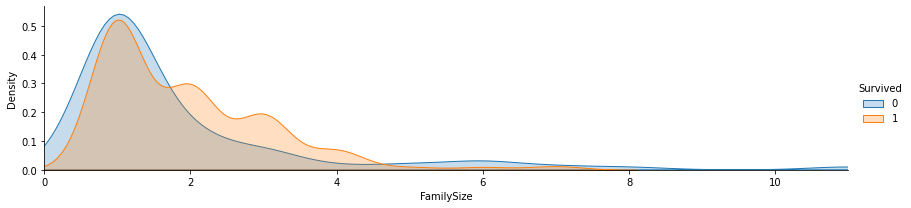

In [127]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4) # aspect ?
facet.map(sns.kdeplot, 'FamilySize', shade=True) # FamilySize에 따른 생존여부를 보여주고 그래프 안쪽 채우기 True
facet.set(xlim=(0, train["FamilySize"].max())) # x축 길이는 0 ~ 가장 많은 동반자까지 제한
facet.add_legend() # 어떤게 생존인지 범주 보여주기 0, 1
plt.xlim(0) # 그림을 보니 동반자가 많을 수록 생존을 많이 함

In [128]:
# familysize도 이미 정수지만.. 좀 더 범주화를 위해 구분함 => 너무 세분화 되면, 이것에 대해 오버피팅이 날 수 있음 (잘못된 편향)
family_mapping = {1: 0, 2: 0.4, 3 : 0.8, 4 : 1.2, 5 : 1.6, 6 : 2.0, 7 : 2.4, 8 : 2.8, 9 : 3.2, 10 : 3.6, 11 : 4.0}

# mapping
for dataset in train_test_dataset:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [129]:
# 여기서 이제 SibSP와 Parch는 FamilySize로 퉁쳤으므로 필요 없음 drop하기
# train_test_dataset.drop(["SibSp", "Parch"], axis=1) >> train_test_dataset은 list라 drop이 안 됨, df 형태만 가능
train = train.drop(["SibSp", "Parch", "Ticket"], axis=1) # SibSp, Parch field 삭제
train

# Ticket은 아무짝에 활용이 안되므로 삭제
# train_dataset = train_dataset.drop(["Ticket"], axis=1) # SibSp, Parch field 삭제
# train_dataset

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0.0,1.8,0,3.0,0.0
887,888,1,1,1,1.0,1.0,0.4,0,1.0,0.0
888,889,0,3,1,1.0,1.0,2.0,0,1.0,1.2
889,890,1,1,0,1.0,1.0,0.8,1,0.0,0.0


In [130]:
test.drop(["SibSp", "Parch", "Ticket"], axis=1, inplace=True) # inplace=True 설정해서 바로 df에 적용

test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,0.8,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,0.8,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0.0,1.8,0,0,0.0
414,1306,1,1,3.0,3.0,0.8,1,3,0.0
415,1307,3,0,3.0,0.0,2.0,0,0,0.0
416,1308,3,0,2.0,0.0,1.8,0,0,0.0


In [131]:
# train_dataset = train_dataset.drop(["PassengerId"], axis=1)
# train_dataset엔 survived 빼주기
# 왜 굳이 이렇게 분리하냐면 이후 train으론 fit을 할거라서..
train_dataset = train.drop("Survived", axis=1) 

# label만 따로 target에 빼 줌 >> target은 정답지로 모델링에 활용됨
target = train["Survived"]

train_dataset.shape, target.shape

((891, 9), (891,))

In [132]:
# 이렇게 함으로써 모든 정보가 숫자로 바뀐 dataframe이 생성됨! 
# 이제 이것으로 모델학습을 시킬 것임
train_dataset

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,0,1.0,0.0,2.0,0,0.0,0.4
1,2,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,3,1,1.0,0.0,2.0,0,1.0,0.0
3,4,1,1,2.0,2.0,0.8,0,2.0,0.4
4,5,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,887,2,0,2.0,0.0,1.8,0,3.0,0.0
887,888,1,1,1.0,1.0,0.4,0,1.0,0.0
888,889,3,1,1.0,1.0,2.0,0,1.0,1.2
889,890,1,0,1.0,1.0,0.8,1,0.0,0.0


# 모델학습 (Modeling)

In [133]:
# 일단 어떤 클래시파이어를 써야할까?
# 여기선 5개의 클래시파이어로 분류함 (여러개 알고 앙상블 활용하는게 가장 좋을 듯)
# KNN, Decision Tree, random forest, svm, naive bayes의 classifier를 활용할 수 있음

# Cross Validation

In [134]:
# k-fold validation을 수행할 예정
# train dataset중 k% 만큼 validation set으로 둔다.
# 예로 k=10이라 하면 총 10번의 validation set을 바꿔가며 각각의 성능을 검증한다. (round 10)
# 각 round마다의 acc를 구하고 이것을 평균 >> final acc
# 여기서 가장 높게 나온 분류기를 test 모델에 쓴다.

In [135]:
# scikitlearn에서 각 분류기들 호출 (어짜피 호출 가능하므로 이렇게 하자)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [136]:
# Title 빼고 모두 결측치이므로 Title도 빼주자
train_dataset.drop("Title", axis=1, inplace=True) # 8가지 feature
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin        891 non-null    float64
 6   Embarked     891 non-null    int64  
 7   FamilySize   891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [137]:
# for cross validation (교차 검증)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [138]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin        891 non-null    float64
 6   Embarked     891 non-null    int64  
 7   FamilySize   891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [139]:
# KNN 방식으로 평가
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
# 여기 입력에서는 Nan값이 있으면 안됨!
score = cross_val_score(clf, train_dataset, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.52222222 0.61797753 0.52808989 0.58426966 0.60674157 0.57303371
 0.49438202 0.56179775 0.56179775 0.43820225]


In [140]:
# KNN Score
round(np.mean(score)*100, 2) # 이것의 의미?

54.89

In [141]:
# Decision Tree 방식으로 평가
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_dataset, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.72222222 0.83146067 0.74157303 0.76404494 0.73033708 0.78651685
 0.74157303 0.70786517 0.71910112 0.76404494]


In [142]:
# decision tree score
round(np.mean(score)*100, 2)

75.09

In [143]:
# Random Forest 방식으로 산출
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_dataset, target, cv=k_fold , n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.79775281 0.75280899 0.79775281 0.79775281 0.83146067
 0.7752809  0.62921348 0.78651685 0.82022472]


In [144]:
# decision tree score
round(np.mean(score)*100, 2)

77.55

In [145]:
# Naive Bayes 방식으로 산출
clf = GaussianNB() # 반드시 ()해주기 클래스니까
scoring = 'accuracy'
score = cross_val_score(clf, train_dataset, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.74157303 0.74157303 0.70786517 0.68539326 0.7752809
 0.73033708 0.79775281 0.84269663 0.79775281]


In [146]:
# Naive Bayes 점수
round(np.mean(score)*100, 2)

76.31

In [147]:
# SVM 방식으로 산출
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_dataset, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.56666667 0.66292135 0.65168539 0.59550562 0.69662921 0.65168539
 0.59550562 0.65168539 0.56179775 0.52808989]


In [148]:
# SVM 점수
round(np.mean(score)*100, 2)

61.62

# 여러가지 분류기중 가장 성능 좋은 것으로 Test 진행 (나의 경우 decision tree classifier로)

In [149]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin        891 non-null    float64
 6   Embarked     891 non-null    int64  
 7   FamilySize   891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    int64  
 8   FamilySize   418 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [151]:
# test dataset과 맞추기 위해 train의 PassengerID field 삭제
# test도 Title field 삭제
train_dataset.drop(["PassengerId"],axis=1, inplace=True)
test.drop(["Title"], axis=1, inplace=True)

In [152]:
# 좋았던 분류기 지정
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_dataset, target)

test_dataset = test.drop(["PassengerId"], axis=1).copy()
prediction = clf.predict(test_dataset) # 예측할 땐 train, test filed 개수를 일치시켜야 함! (반드시) 

In [155]:
# 이렇게 1개의 field만 받아와도 됨
tt = test["PassengerId"]
tt

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [156]:
# 정답파일 생성하기
submission = pd.DataFrame({
    "PassengerId": tt,
    "Survived": prediction
})

submission.to_csv('submission.csv', index=False)

In [157]:
# 파일 보기
submission = pd.read_csv("submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
